## DBSCAN Clutering

### [DBSCAN](https://www.analyticsvidhya.com/blog/2020/09/how-dbscan-clustering-works/)

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a popular clustering algorithm used as an alternative to K-means in predictive analytics. It doesn’t require the number of clusters to be defined in advance and is more flexible with the shape of the clusters. DBSCAN is a density-based clustering algorithm, where the algorithm finds high-density areas that are separated from one another by low-density regions. The algorithm groups together closely packed points by identifying the core samples that have a minimum number of neighbors within a specified radius.

![DBSCAN](db26.webp)

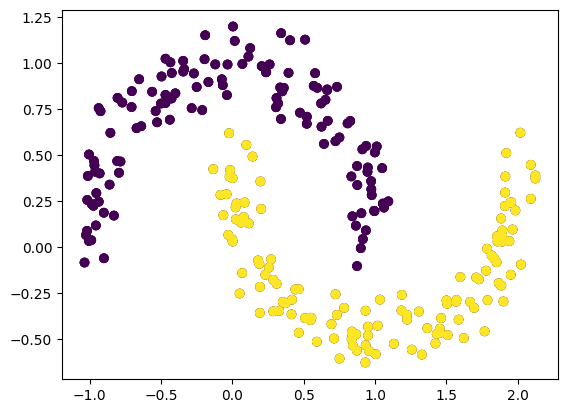

In [2]:

from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
%matplotlib inline
X,y=make_moons(n_samples=250,noise=0.10)
X
plt.scatter(X[:,0],X[:,1],c=y)
##feature scaling(Standard Scaling)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

dbcan=DBSCAN(eps=0.5)
dbcan.fit(X_scaled)
dbcan.labels_
plt.scatter(X[:,0],X[:,1],c=dbcan.labels_)
plt.scatter(X[:,0],X[:,1],c=y)


In [3]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib

In [4]:
np.random.seed(42)

# Function for creating datapoints in the form of a circle
def PointsInCircum(r,n=100):
    return [(math.cos(2*math.pi/n*x)*r+np.random.normal(-30,30),math.sin(2*math.pi/n*x)*r+np.random.normal(-30,30)) for x in range(1,n+1)]

In [5]:
df1 = pd.DataFrame(PointsInCircum(500,1000))
df2 = pd.DataFrame(PointsInCircum(300,700))
df3 = pd.DataFrame(PointsInCircum(100,300))

df = pd.concat([df1, df2, df3])

# Adding noise to the dataset


In [6]:
# Adding noise to the dataset
noise = pd.DataFrame([(np.random.randint(-600,600),np.random.randint(-600,600)) for i in range(300)])
df = pd.concat([df, noise])

In [7]:
df

,0,1
0,484.891555,-31.006357
1,489.391178,21.973916
2,462.886575,-27.599889
3,517.218479,5.588090
4,455.669049,1.982181
...,...,...
295,-229.000000,-504.000000
296,392.000000,-580.000000
297,134.000000,525.000000
298,469.000000,-535.000000


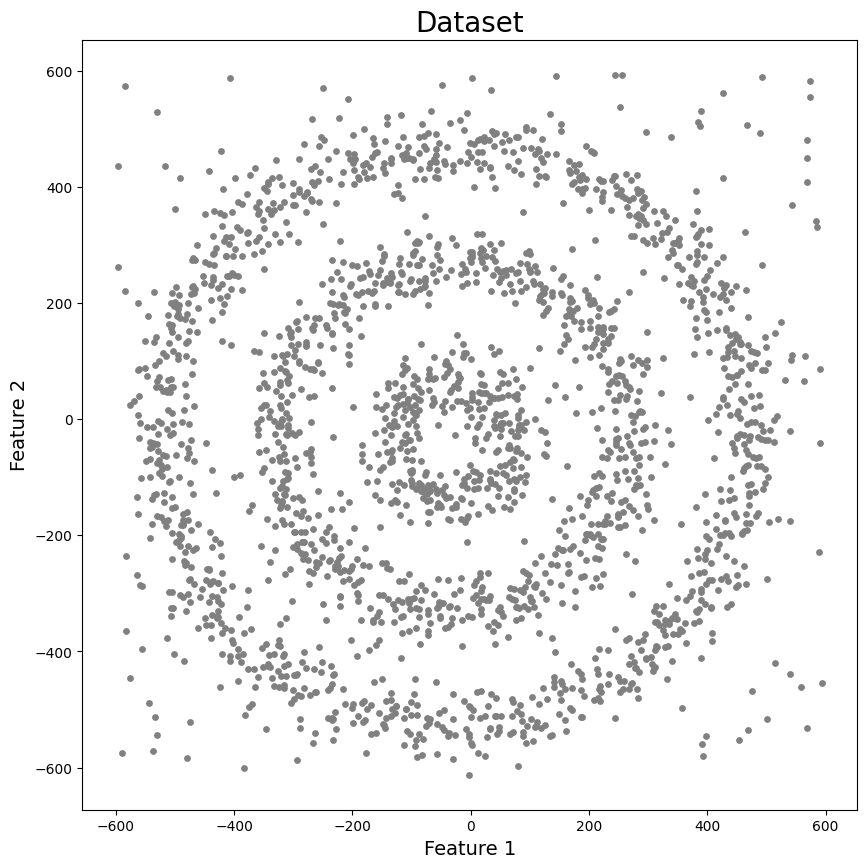

In [8]:
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],s=15,color='grey')
plt.title('Dataset',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [9]:
from sklearn.cluster import KMeans , DBSCAN , AgglomerativeClustering

In [12]:
import os

os.environ["LOKY_MAX_CPU_COUNT"] = "4"  # Set to the number of cores you want to use

In [13]:
k_means = KMeans(n_clusters=4,random_state=42)
k_means.fit(df[[0,1]])

KMeans(n_clusters=4, random_state=42)

In [14]:
k_means.labels_

array([2, 2, 2, ..., 2, 0, 1])

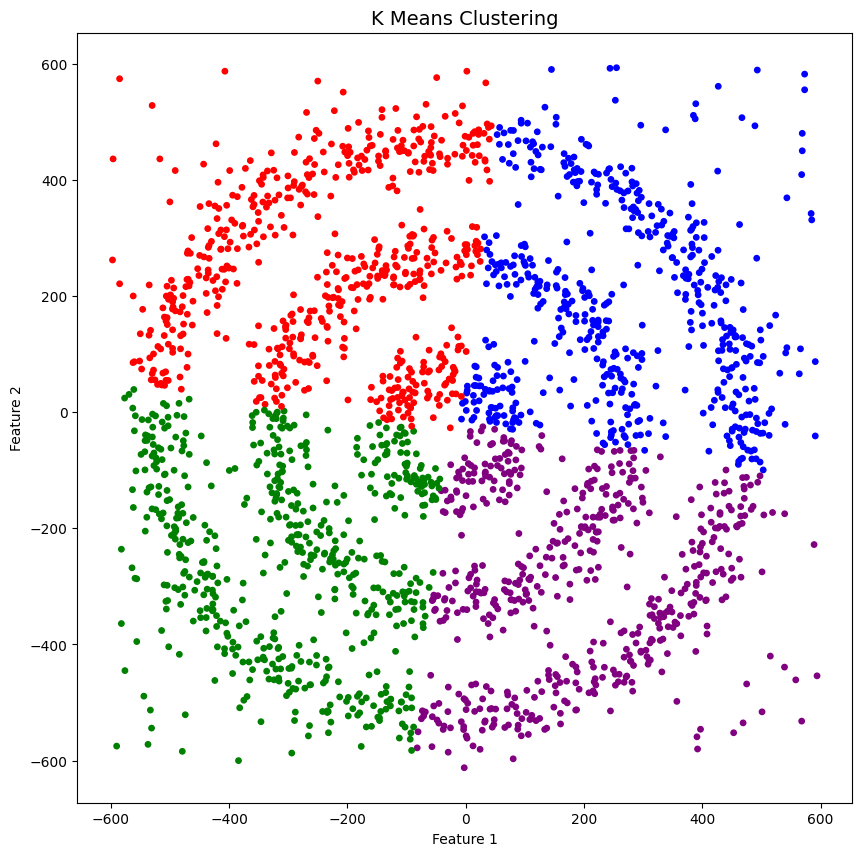

In [15]:
import matplotlib.colors


df['K_labels'] = k_means.labels_

colors = ['purple','red','blue','green']
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['K_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('K Means Clustering', fontsize=14)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [16]:
hsc = AgglomerativeClustering(n_clusters=4,metric='euclidean')
hsc.fit(df[[0,1]])

AgglomerativeClustering(n_clusters=4)

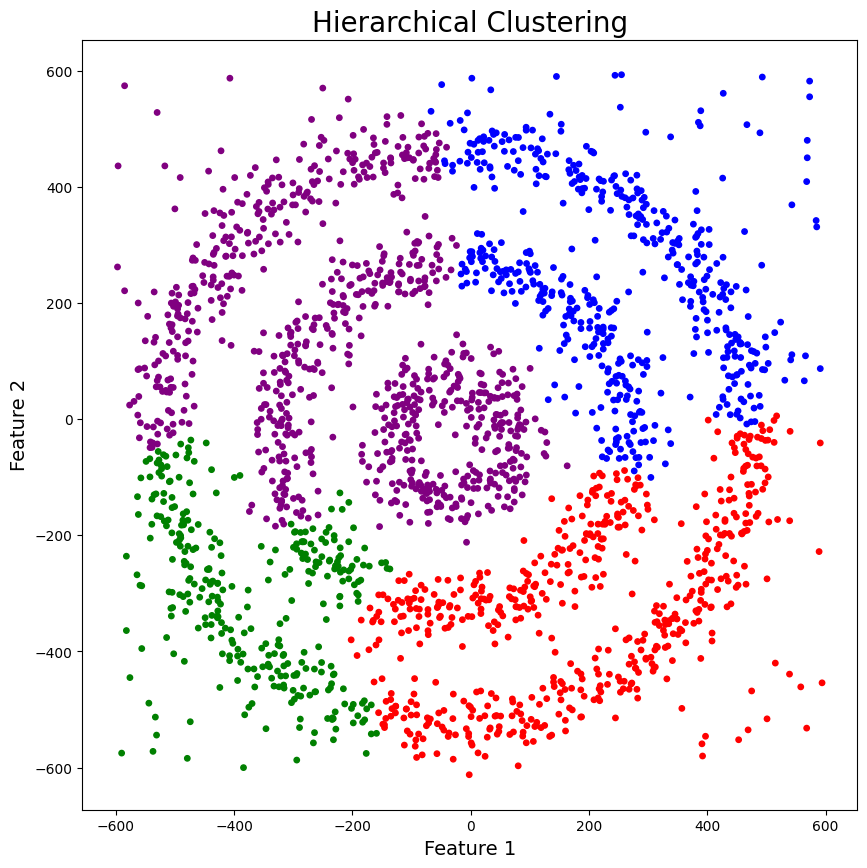

In [17]:
df['HR_labels']=hsc.labels_

# Plotting resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['HR_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('Hierarchical Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [19]:
dbscan = DBSCAN()
dbscan.fit(df[[0,1]])


DBSCAN()

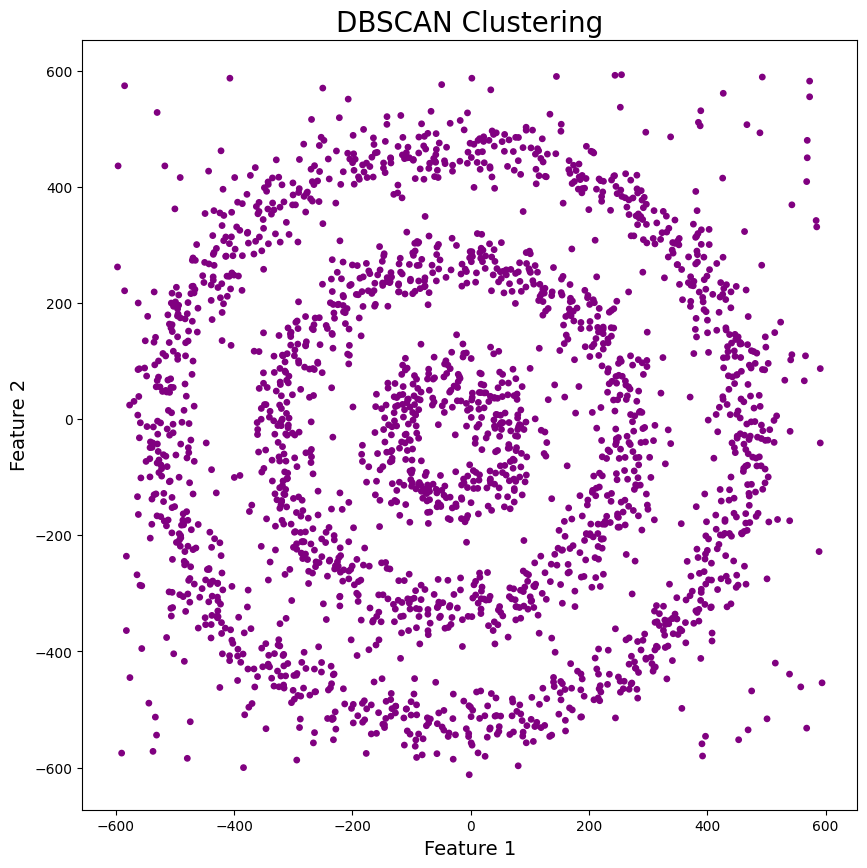

In [21]:
# Plotting resulting clusters
df['DBSCAN_labels'] = dbscan.labels_
plt.figure(figsize=(10,10)) 
plt.scatter(df[0],df[1],c=df['DBSCAN_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15) 
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [36]:
from sklearn.neighbors import NearestNeighbors
# Assuming X is your data
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df[[0,1]])
distances,indices = nbrs.kneighbors(df[[0,1]])

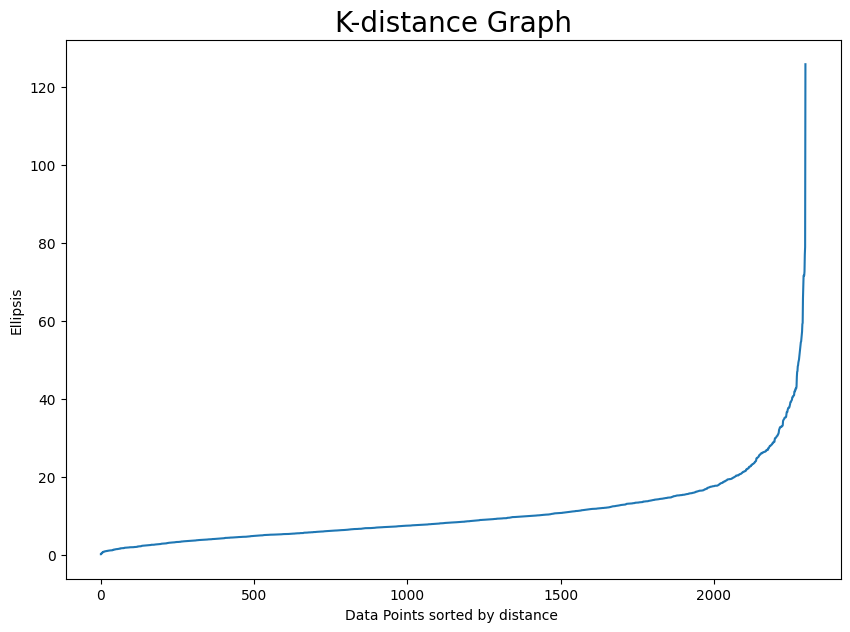

In [37]:
distances = np.sort(distances,axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,7))
plt.plot(distances)
plt.title('K-distance Graph', fontsize= 20)
plt.xlabel('Data Points sorted by distance ')
plt.ylabel('Ellipsis')
plt.show()

The optimum value of epsilon is at the point of maximum curvature in the K-Distance Graph, which is 30 in this case.

In [39]:
dbscan_opt = DBSCAN(eps=30,min_samples=6)
dbscan_opt.fit(df[[0,1]])

DBSCAN(eps=30, min_samples=6)

In [43]:
df['DBscan_opt_labels'] = dbscan_opt.labels_
df['DBscan_opt_labels'].value_counts()

DBscan_opt_labels
 0    1030
 1     730
 2     318
-1     222
Name: count, dtype: int64

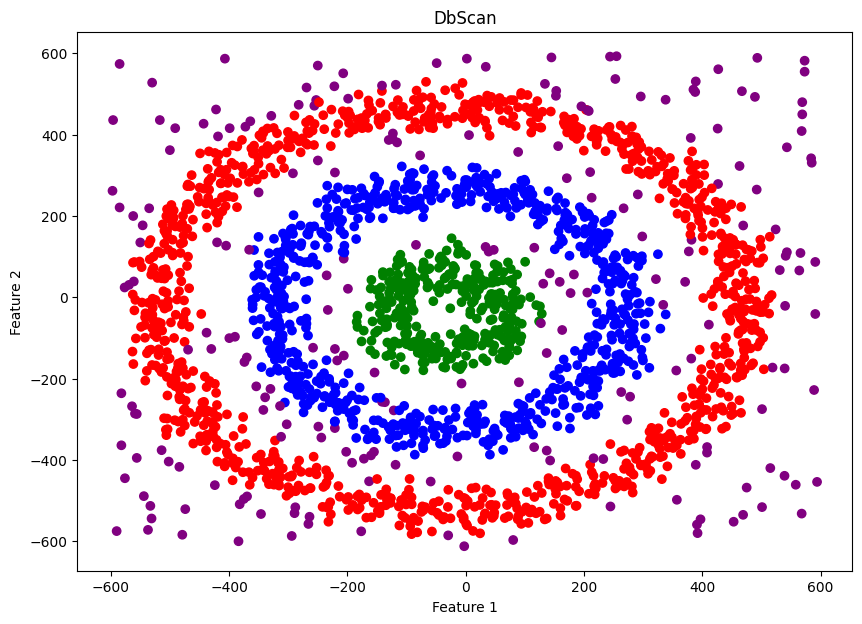

In [44]:
plt.figure(figsize=(10,7))
plt.scatter(df[0],df[1],c=df['DBscan_opt_labels'],cmap=matplotlib.colors.ListedColormap(colors))
plt.title('DbScan')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()